1 Import all necessary libraries. Then load the dataset and save it to the dataframe. In this exercise you will use only meanfun (*average of fundamental frequency measured across acoustic signal*) and IQR (*interquantile range measured in kHz*) columns. Filter data so that only forementioned columns will be included.

In [1]:
import pandas as pd

df = pd.read_csv("./data_files/voice.csv")

# Select meanfun and IQR columns
data = df[["meanfun", "IQR"]]

data

,meanfun,IQR
0,0.084279,0.075122
1,0.107937,0.073252
2,0.098706,0.123207
3,0.088965,0.111374
4,0.106398,0.127325
...,...,...
3163,0.182790,0.151859
3164,0.188980,0.162193
3165,0.209918,0.190936
3166,0.172375,0.176435


2 Run the predictions for the data so that it will be categorised for male and female data.

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select meanfun and IQR columns
df = df[["meanfun", "IQR","label"]]

# Split data into features and labels
X = df[["meanfun", "IQR"]]
y = df["label"]

# Initialize model
kmeans = KMeans(n_clusters=2, n_init=1)

# Fit model
kmeans.fit(X)

# Get predictions
y_pred = kmeans.predict(X)

# New column for predictions
df["predictions"] = y_pred

# Map predictions to male and female categories
df["predictions"] = df["predictions"].map({0: "female", 1: "male"})

df


,meanfun,IQR,label,predictions
0,0.084279,0.075122,male,female
1,0.107937,0.073252,male,female
2,0.098706,0.123207,male,female
3,0.088965,0.111374,male,female
4,0.106398,0.127325,male,female
...,...,...,...,...
3163,0.182790,0.151859,female,female
3164,0.188980,0.162193,female,female
3165,0.209918,0.190936,female,female
3166,0.172375,0.176435,female,female


3 Visualise the data so that clusters for male and female data will be presented in scatter plot (centroids should also be included).

<module 'matplotlib.pyplot' from 'C:\\Users\\roy\\lib\\site-packages\\matplotlib\\pyplot.py'>

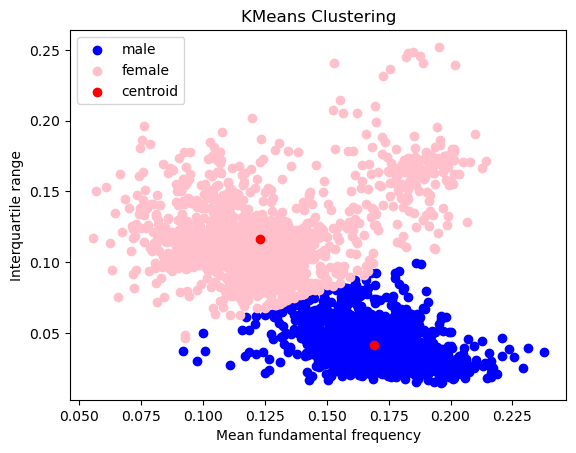

In [3]:
# Create scatter plot of data colored by predictions
plt.scatter(x=df[df["predictions"] == "male"]["meanfun"], 
            y=df[df["predictions"] == "male"]["IQR"], 
            c="blue", label="male")
plt.scatter(x=df[df["predictions"] == "female"]["meanfun"], 
            y=df[df["predictions"] == "female"]["IQR"], 
            c="pink", label="female")

# Plot centroids
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
            c="red", marker="o", label="centroid")

plt.title("KMeans Clustering")
plt.xlabel("Mean fundamental frequency")
plt.ylabel("Interquartile range")
plt.legend()
plt

4 Validate K-means clustering prediction results using confusion matrix.

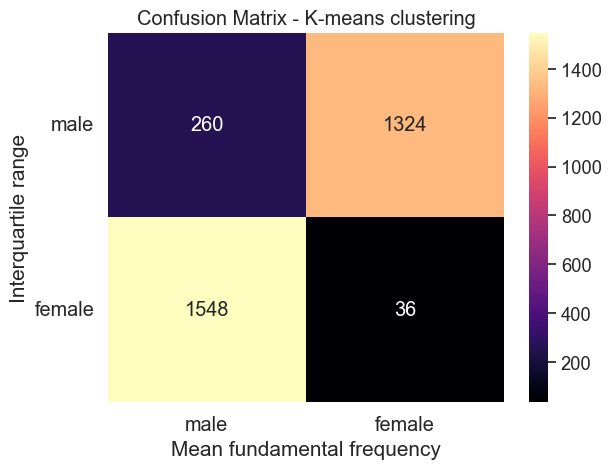

<Figure size 1000x800 with 0 Axes>

In [7]:
from sklearn import metrics
import seaborn as sns

truth = []

for i in df["label"]:
    if i == "male":
        truth.append(1)
    elif i == "female":
        truth.append(0)
    else:
        truth.append(2)
        
labels = df["label"].unique()

# Confusion matrix definition
confusion_matrix = metrics.confusion_matrix(truth, y_pred)

# Input values for confusion matrix
ax = plt.axes()
sns.set(font_scale = 1.2)
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix, annot = True, fmt = "g", ax = ax, cmap = "magma")

# Titles for figure and names for axes
ax.set_title("Confusion Matrix - K-means clustering")
ax.set_xlabel("Mean fundamental frequency", fontsize = 15)
ax.set_xticklabels([""] + labels)
ax.set_ylabel("Interquartile range", fontsize = 15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()